
# Pytorch + HuggingFace 
## KoElectra Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# HuggingFace transformers 설치 
!pip install transformers
!wget https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv

!wget https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/dev.tsv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 26.7 MB/s 
     |████████████████████████████████| 7.6 MB 56.7 MB/s 
     |████████████████████████████████| 163 kB 73.3 MB/s 
--2022-11-02 16:48:25--  https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 913546 (892K) [text/plain]
Saving to: ‘train.tsv’

train.tsv           100%[===================>] 892.13K  --.-KB/s    in 0.007s  

2022-11-02 16:48:25 (123 MB/s) - ‘train.tsv’ saved [913546/913546]

--2022-11-02 16:48:25--  https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/dev.tsv
Resolving raw.githubusercon

In [ ]:
import csv
 
f = open("test.txt", 'w')
f.close()

f = open("train.txt", 'w')
f.close()

# Open tsv and txt files(open txt file in write mode)
tsv_file = open("train.tsv")
txt_file = open("train.txt", "w")

tsv_file2 = open("dev.tsv")
txt_file2 = open("test.txt", "w")
 
# Read tsv file and use delimiter as \t. csv.reader
# function returns a iterator
# which is stored in read_csv
read_tsv = csv.reader(tsv_file, delimiter="\t")
read_tsv2 = csv.reader(tsv_file2, delimiter="\t")
 
 
# write data in txt file line by line
count_e = 0

for row in read_tsv2:
    joined_string = "\t".join(row)
    txt_file2.writelines(joined_string+'\n')

for row in read_tsv:
    joined_string = "\t".join(row)
    txt_file.writelines(joined_string+'\n')
  
# close files
txt_file.close()
txt_file2.close()

'''for train data A3
    if(count_e == 0):
      count_e+=1
      continue

    
    if row[0].find("@") > -1:
      continue

    if row[0].find("http") > -1:
      continue
    row[1] = str(1 - int(row[1]))

    
    joined_string = joined_string.lstrip()'''
    

In [ ]:
!head train.txt
!head test.txt

comments	contain_gender_bias	bias	hate
(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네....	False	others	hate
....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을 미처 알지못했네요ㅠ	False	none	none
...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래야, 공정한 사회지...심은대로 거두거라...	False	none	hate
1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데	False	none	none
1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각이 없노	True	gender	hate
10+8 진짜 이승기랑 비교된다	False	none	none
100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, 여성 투표권 삭제가 세계의 공통문화로 자리잡을듯. 암탉이 너무 울어댐.	True	gender	hate
10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음	False	none	none
10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐	False	none	offensive
comments	contain_gender_bias	bias	hate
송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.	False	none	none
지현우 나쁜놈	False	none	offensive
알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라	False	none	hate
설마 ㅈ 현정 작가 아니지??	True	gender	hate
이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀 하고사시죠.	False	none	offensive
일베충들 ㅂㄷ거리는것봐라 ㅉㅉ	False	others	hate
아이즈원 힘내세요...일본 진출도 했으니 일본서 좋은 모습 보여줘도 팬들은 응원 합니

In [ ]:
import pandas as pd
import torch
from torch.nn import functional as F
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, ElectraForSequenceClassification, AdamW
from tqdm.notebook import tqdm

In [ ]:
# GPU 사용
device = torch.device("cuda")

# Dataset 만들어서 불러오기 
data set 형식 (comment \t A \t B \t hate)

In [ ]:
class NSMCDataset(Dataset):
  
  def __init__(self, csv_file):
    
    # 일부 값중에 NaN이 있음...
    self.dataset = pd.read_csv(csv_file, sep='\t').dropna(axis=0) 
    '''
    # 중복제거
    self.dataset.drop_duplicates(subset=['document'], inplace=True)
    '''
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

    print(self.dataset.describe())
  
  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, idx):
    row = self.dataset.iloc[idx, [0,3]].values
    text = row[0]
    if(row[1] == "hate"):
      y = 1

    else:
      y = 0
    #y = row[1]

    inputs = self.tokenizer(
        text, 
        return_tensors='pt',
        truncation=True,
        max_length=256,
        pad_to_max_length=True,
        add_special_tokens=True
        )
    
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y

txt 데이터 형식 - (comment \t hate(0,1))

In [ ]:
class AdditionalDataset(Dataset):
  
  def __init__(self, csv_file):
    
    # 일부 값중에 NaN이 있음...
    
    self.dataset = pd.read_csv(csv_file, sep='\t').dropna(axis=0) 
    '''
    # 중복제거
    self.dataset.drop_duplicates(subset=['document'], inplace=True)
    '''
    self.tokenizer = AutoTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

    print(self.dataset.describe())
  
  def __len__(self):
    return len(self.dataset)
  
  def __getitem__(self, idx):
    row = self.dataset.iloc[idx, [0,1]].values
    text = row[0]
    y = int(row[1])

    inputs = self.tokenizer(
        text, 
        return_tensors='pt',
        truncation=True,
        max_length=256,
        pad_to_max_length=True,
        add_special_tokens=True
        )
    
    input_ids = inputs['input_ids'][0]
    attention_mask = inputs['attention_mask'][0]

    return input_ids, attention_mask, y

In [ ]:
train_dataset = NSMCDataset("train.txt")
test_dataset = NSMCDataset("test.txt")

Downloading:   0%|          | 0.00/61.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263k [00:00<?, ?B/s]

                                                 comments contain_gender_bias  \
count                                                7896                7896   
unique                                               7896                   2   
top     (현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...               False   
freq                                                    1                6664   

        bias  hate  
count   7896  7896  
unique     3     3  
top     none  none  
freq    5148  3486  
                           comments contain_gender_bias  bias       hate
count                           471                 471   471        471
unique                          471                   2     3          3
top     송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.               False  none  offensive
freq                              1                 404   342        189


파일복사

In [ ]:
src_file= open("trainA3.txt", 'r')
des_file=open("/content/drive/MyDrive/ColabKoElectraHate/hatespeechdata/applyFormat/trainA3.txt","w")

data = src_file.read()
des_file.write(data)

src_file.close()
des_file.close()

FileNotFoundError: ignored

파일 합치기

In [ ]:
src_file1= open("/content/drive/MyDrive/ColabKoElectraHate/hatespeechdata/applyFormat/trainA1.txt", 'r')
src_file2=open("/content/drive/MyDrive/ColabKoElectraHate/hatespeechdata/applyFormat/trainA3.txt","r")
des_file = open("totalTrainSet.txt","w")
data1 = src_file1.read()
data2 = src_file2.read()
des_file.write(data1)
des_file.write(data2)

src_file1.close()
src_file2.close()
des_file.close()

In [ ]:
train_dataset[0]

# Create Model

In [ ]:
model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-v3-discriminator").to(device)

# 한번 실행해보기
#text, attention_mask, y = train_dataset[0]
#model(text.unsqueeze(0).to(device), attention_mask=attention_mask.unsqueeze(0).to(device))

Downloading:   0%|          | 0.00/452M [00:00<?, ?B/s]

Some weights of the model checkpoint at monologg/koelectra-base-v3-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-v3-discriminator and are newly initialized: 

In [ ]:
# 모델 레이어 보기
model

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(35000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0): ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm

# Learn

In [ ]:
epochs = 1
batch_size = 64

In [ ]:
optimizer = AdamW(model.parameters(), lr=0.001)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
losses = []
accuracies = []
iterLoss = []
iterCount = 0

In [ ]:
for i in range(epochs):
  total_loss = 0.0
  correct = 0
  total = 0
  batches = 0

  model.train()

  for input_ids_batch, attention_masks_batch, y_batch in tqdm(train_loader):
    optimizer.zero_grad()
    y_batch = y_batch.to(device)
    
    y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
    loss = F.cross_entropy(y_pred, y_batch)
    loss.backward()
      
      
      
    optimizer.step()

    iterLoss.append(loss.item())
    iterCount = iterCount + 1
    total_loss += loss.item()

    _, predicted = torch.max(y_pred, 1)
    correct += (predicted == y_batch).sum()
    total += len(y_batch)

    batches += 1
    if batches % 100 == 0:
      print("Batch Loss:", total_loss, "Accuracy:", correct.float() / total)
  
  losses.append(total_loss)
  accuracies.append(correct.float() / total)
  print("Train Loss:", total_loss, "Accuracy:", correct.float() / total)
  #print("\nfinal Loss", )

  0%|          | 0/705 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2307: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


RuntimeError: ignored

In [ ]:
f = open("/content/drive/MyDrive/ColabKoElectraHate/hatespeechdata/loss_save.txt", 'w')
for i in iterLoss:
  f.write(i + " ")
f.write("\n")

f.write(str(iterCount))

f.close()

TypeError: ignored

In [ ]:
# 모델 저장하기
torch.save(model.state_dict(), "/content/drive/MyDrive/ColabKoElectraHate/second_model_10epoch.pt")

In [ ]:
accuracies

[tensor(0.7090, device='cuda:0'),
 tensor(0.8041, device='cuda:0'),
 tensor(0.8454, device='cuda:0'),
 tensor(0.8787, device='cuda:0'),
 tensor(0.9108, device='cuda:0'),
 tensor(0.9294, device='cuda:0'),
 tensor(0.9499, device='cuda:0'),
 tensor(0.9578, device='cuda:0'),
 tensor(0.9701, device='cuda:0'),
 tensor(0.9756, device='cuda:0')]

Loss 그래프 그리기
(loss / iteration)

In [ ]:
import matplotlib.pyplot as plt

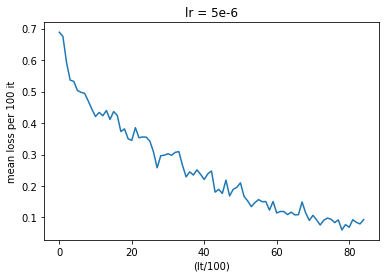

"\nfor i in range (10):\n  sum = 0\n  for j in range (int(iterCount/10)):\n    sum = sum + iterLoss[i*858+j]\n\n  meanLoss.append(sum/858)\n\nplt.plot(range(1,11), meanLoss)\nplt.xlabel('epoch')\nplt.ylabel('loss')\nplt.title('lr = 5e-6')\nplt.show()\n"

In [ ]:
#iteration 
meanIterLoss = []
for i in range (int(iterCount/100)):
  sum = 0
  for j in range (100):
    sum = sum + iterLoss[i*100+j]

  meanIterLoss.append(sum/100)

plt.plot(range(int(iterCount/100)), meanIterLoss)
plt.xlabel('(It/100)')
plt.ylabel('mean loss per 100 it')
plt.title('lr = 5e-6')
plt.show()

meanLoss = []
'''
for i in range (10):
  sum = 0
  for j in range (int(iterCount/10)):
    sum = sum + iterLoss[i*858+j]

  meanLoss.append(sum/858)

plt.plot(range(1,11), meanLoss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('lr = 5e-6')
plt.show()
'''

In [ ]:
losses, accuracies

([480.8246337175369,
  368.75003811717033,
  309.7392234355211,
  255.96898805722594],
 [tensor(0.7090, device='cuda:0'),
  tensor(0.8041, device='cuda:0'),
  tensor(0.8454, device='cuda:0'),
  tensor(0.8787, device='cuda:0')])

#테스트 데이터셋 정확도 확인하기

In [ ]:
model.eval()

test_correct = 0
test_total = 0
sent_count = 0

for input_ids_batch, attention_masks_batch, y_batch in tqdm(test_loader):
  y_batch = y_batch.to(device)
  y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
  _, predicted = torch.max(y_pred, 1)
  test_correct += (predicted == y_batch).sum()
  if (predicted.item() != 0):
    print("")
    print(sent_count)

  test_total += len(y_batch)
  sent_count += 1

print("Accuracy:", test_correct.float() / test_total)

In [ ]:
# 모델 저장하기
#torch.save(model.state_dict(), "/content/drive/MyDrive/ColabKoElectraHate/model_10epoch.pt")

In [ ]:
#model.save_pretrained("/content/drive/MyDrive/ColabKoElectraHate")

In [ ]:
model.load_state_dict(torch.load("/content/drive/MyDrive/FianlHateDetection/HateModel.pt"))

<All keys matched successfully>

In [ ]:
def get_prediction(sentence):
  f = open("userInput.txt", 'w')
  f.writelines("comments	contain_gender_bias	bias	hate\n")
  f.writelines(a+"	False	none	none")
  f.close()


  input_data = NSMCDataset("userInput.txt")
  input_loader = DataLoader(input_data, batch_size=1, shuffle=True)

  model.eval()

  test_correct = 0
  test_total = 0

  for input_ids_batch, attention_masks_batch, y_batch in input_loader:
    y_batch = y_batch.to(device)
    y_pred = model(input_ids_batch.to(device), attention_mask=attention_masks_batch.to(device))[0]
    _, predicted = torch.max(y_pred, 1)
    test_correct += (predicted == y_batch).sum()
    test_total += len(y_batch)

#print("Accuracy:", test_correct.float() / test_total)
  if(predicted.item() == 0):
    return 0

  else:
    return 1

In [ ]:
a = input()
print(get_prediction(a))